In [ ]:
'''
    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton, Vishnu Purushothaman Sreenivasan
'''
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


class LinearRegression:

    def __init__(self, init_theta=None, alpha=0.01, n_iter=100):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = init_theta
        self.JHist = None


    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        self.JHist = []
        for i in range(self.n_iter):
            self.JHist.append( (self.computeCost(X, y, theta), theta) )
            print ("Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta: ", theta)
            # TODO:  add update equation here
            error = np.dot(X, theta) - y
            gradient = (1/n) * np.dot(X.T, error)
            theta = theta - self.alpha * gradient
        return theta


    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost
              ** make certain you don't return a matrix with just one value! **
        '''
        # TODO: add objective (cost) equation here
        n = len(y)
        error = np.dot(X, theta) - y
        cost = (1/(2*n)) * np.dot(error.T, error)
        return cost



    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''
        n = len(y)
        n,d = X.shape
        if self.theta is None:
            self.theta = np.matrix(np.zeros((d,1)))
        self.theta = self.gradientDescent(X,y,self.theta)


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        # TODO:  add prediction function here
        predictions = np.dot(X, self.theta)
        return predictions

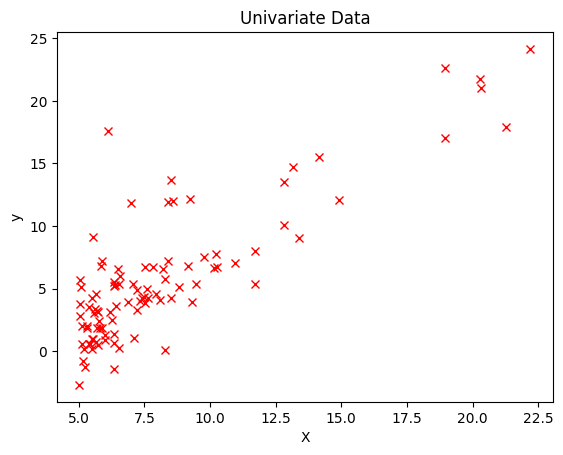

Iteration:  1  Cost:  [[4256.57002701]]  Theta:  [[10.]
 [10.]]
Iteration:  2  Cost:  [[153.41562305]]  Theta:  [[9.14241135]
 [1.69691422]]
Iteration:  3  Cost:  [[23.70450203]]  Theta:  [[8.97091378]
 [0.22284515]]
Iteration:  4  Cost:  [[19.55335965]]  Theta:  [[ 8.92141228]
 [-0.03727971]]
Iteration:  5  Cost:  [[19.37006882]]  Theta:  [[ 8.89363145]
 [-0.08161346]]
Iteration:  6  Cost:  [[19.3123488]]  Theta:  [[ 8.86974598]
 [-0.08759093]]
Iteration:  7  Cost:  [[19.25878383]]  Theta:  [[ 8.84658712]
 [-0.08675349]]
Iteration:  8  Cost:  [[19.20553652]]  Theta:  [[ 8.82359151]
 [-0.08470805]]
Iteration:  9  Cost:  [[19.15248495]]  Theta:  [[ 8.80065895]
 [-0.08245128]]
Iteration:  10  Cost:  [[19.0996246]]  Theta:  [[ 8.77777157]
 [-0.08016036]]
Iteration:  11  Cost:  [[19.04695464]]  Theta:  [[ 8.75492613]
 [-0.07786677]]
Iteration:  12  Cost:  [[18.9944744]]  Theta:  [[ 8.732122  ]
 [-0.07557611]]
Iteration:  13  Cost:  [[18.9421832]]  Theta:  [[ 8.70935899]
 [-0.07328937]]
Ite

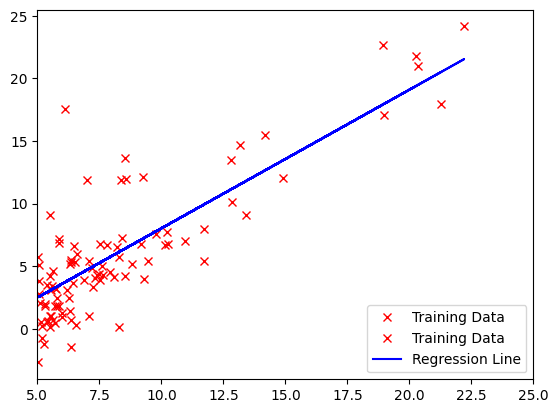

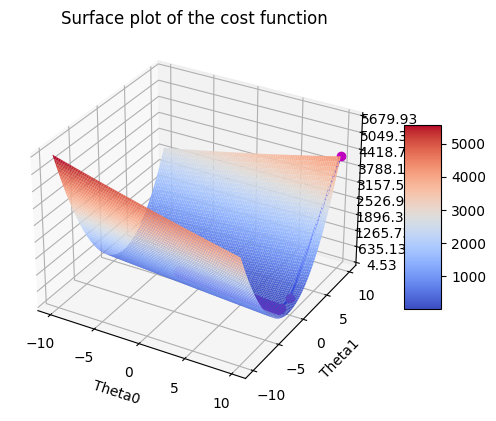

theta_closed_form:  [[-3.89578088]
 [ 1.19303364]]


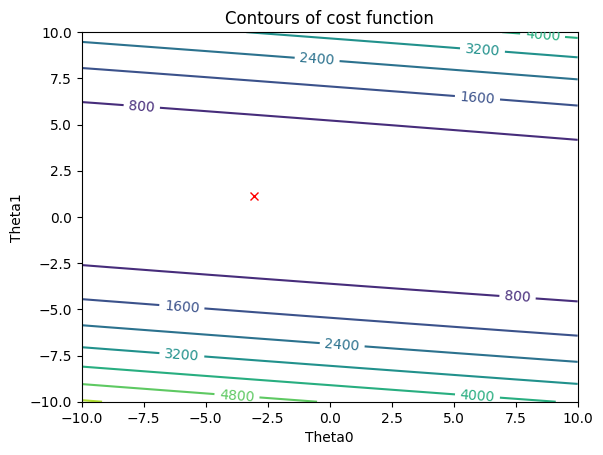

In [ ]:
'''
    TEST SCRIPT FOR UNIVARIATE LINEAR REGRESSION
    AUTHOR Eric Eaton, Vishnu Purushothaman Sreenivasan
'''

'''
Numpy is a standard library in python that lets you do matrix and vector operations like Matlab in python.
Check out documentation here: http://wiki.scipy.org/Tentative_NumPy_Tutorial
If you are a Matlab user this page is super useful: http://wiki.scipy.org/NumPy_for_Matlab_Users
'''
import numpy as np
from numpy.linalg import *

# Matplotlib provides matlab like plotting tools in python
import matplotlib.pyplot as plt

# our linear regression class
#from linreg import LinearRegression

# All the modules needed for 3d surface plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#------------------------------------------------------------------------------------------------
# Plotting tools already written for you.
# Feel free edit and experiment.

def plotData1D( X, y, to_block = True):
    '''
        This function is to plot y vs X where the number of predictors of X is 1.
        Input
        X - n*1 matrix or vector of length n
        y - n*1 matrix or vector of length n
        to_block - boolean flag which when set stops the program execution until the
            plot is closed
    '''
    plt.figure(1)
    plt.clf()
    plt.title("Univariate Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.plot(X,y, 'rx', label='Training Data')
    plt.show(block = to_block)

def plotRegLine1D( lr_model, X, y):
    '''
        Plots the y vs X and also the regressed line according to the theta computed.
        Input
        X - n*2 matrix or vector of length n ( the second dimension is a column of ones for the bias term)
        y - n*1 matrix or vector of length n
        lr_model - linear regression trained model
    '''
    plt.xlim(5, max(20, 25))
    plt.plot(X,y, 'rx', label='Training Data')
    plt.plot(X[:,1], np.dot(X, lr_model.theta), 'b-', label='Regression Line')
    plt.legend(loc='lower right')
    plt.show()


def visualizeObjective(lr_model,t1_vals,t2_vals, X, y):
    '''
        The function does the surface plot of the objective for a
        univariate regression problem with a bias term, so over 2 parameters.
        Search over the space of theta1, theta2.

        It also plots the gradient descent steps as blue points on the surface plot.
        Finally it plots a contour plot of the same

        lr_model - object of class LinReg (already trained)
        t1_vals, t2_vals - values over which the objective function should be plotted
                        List of numbers
        X - n*2 matrix or vector of length n ( the second dimension is a column of ones for the bias term)
        y - n*1 matrix or vector of length n
    '''
    T1,T2 = np.meshgrid(t1_vals, t2_vals)
    n,p = T1.shape

    # Compute the objective function over the space
    Z = np.zeros(T1.shape)
    for i in range(n):
        for j in range(p):
            Z[i,j] = lr_model.computeCost(X,y, np.matrix([T1[i,j],T2[i,j]]).T )

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(T1, T2, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


    # If the history of the objective function plot the path taken by the gradient descent
    if lr_model.JHist !=None:

        for ii in range(len(lr_model.JHist)-1):
            t1 = lr_model.JHist[ii][1].tolist()
            t2 = lr_model.JHist[ii+1][1].tolist()

            J1 = lr_model.JHist[ii][0].tolist()
            J2 = lr_model.JHist[ii+1][0].tolist()

            x_pts = [t1[0][0], t2[0][0]]
            y_pts = [t1[1][0], t2[1][0]]
            J_pts = [J1[0][0], J2[0][0]]
            plt.plot(x_pts, y_pts, J_pts, 'b-')

        for J, t in lr_model.JHist:
            plt.plot(t[0][0], t[1][0], J, 'mo')

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title('Surface plot of the cost function')
    plt.xlabel('Theta0')
    plt.ylabel('Theta1')
    plt.show()

    # Contour plot
    plt.figure()
    plt.clf()
    CS = plt.contour(T1, T2, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Contours of cost function')
    plt.xlabel("Theta0")
    plt.ylabel("Theta1")

    plt.plot(lr_model.theta[0][0],lr_model.theta[1][0], 'rx')

#------------------------------------------------------------------------------------------------

if __name__ == "__main__":
    '''
        Main function to test univariate linear regression
    '''

    # load the data
    filePath = "/content/univariateData.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = np.matrix(allData[:,:-1])
    y = np.matrix((allData[:,-1])).T

    n,d = X.shape

    # Add a row of ones for the bias term
    X = np.c_[np.ones((n,1)), X]

    # initialize the model
    init_theta = np.matrix(np.ones((d+1,1)))*10  # note that we really should be initializing this to be near zero, but starting it near [10,10] works better to visualize gradient descent for this particular problem
    n_iter = 1500
    alpha = 0.01

    # Instantiate objects
    lr_model = LinearRegression(init_theta = init_theta, alpha = alpha, n_iter = n_iter)
    plotData1D(X[:,1],y)
    lr_model.fit(X,y)
    plotRegLine1D(lr_model, X, y)

    # Visualize the objective function convex shape
    theta1_vals = np.linspace(-10, 10, 100);
    theta2_vals = np.linspace(-10, 10, 100);
    visualizeObjective(lr_model,theta1_vals, theta2_vals, X, y)

    # Compute the closed form solution in one line of code
    theta_closed_form = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)  # TODO:  replace "0" with closed form solution
    print ("theta_closed_form: ", theta_closed_form)

In [ ]:
'''
    TEST SCRIPT FOR MULTIVARIATE LINEAR REGRESSION
    AUTHOR Eric Eaton, Vishnu Purushothaman Sreenivasan
'''

'''
Numpy is a standard library in python that lets you do matrix and vector operations like Matlab in python.
Check out documentation here: http://wiki.scipy.org/Tentative_NumPy_Tutorial
If you are a Matlab user this page is super useful: http://wiki.scipy.org/NumPy_for_Matlab_Users
'''
import numpy as np
from numpy.linalg import *

# our linear regression class


if __name__ == "__main__":
    '''
        Main function to test multivariate linear regression
    '''

    # load the data
    filePath = "/content/multivariateData.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = np.matrix(allData[:,:-1])
    y = np.matrix((allData[:,-1])).T

    n,d = X.shape

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Add a row of ones for the bias term
    X = np.c_[np.ones((n,1)), X]

    # initialize the model
    init_theta = np.matrix(np.random.randn((d+1))).T
    n_iter = 2000
    alpha = 0.01

    # Instantiate objects
    lr_model = LinearRegression(init_theta = init_theta, alpha = alpha, n_iter = n_iter)
    lr_model.fit(X,y)

    # Compute the closed form solution in one line of code
    thetaClosedForm = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)  # TODO:  replace "0" with closed form solution
    print ("thetaClosedForm: ", thetaClosedForm)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 [ 95879.16519428]
 [  6451.19521977]]
Iteration:  336  Cost:  [[2.18948792e+09]]  Theta:  [[328669.17579689]
 [ 95941.89029975]
 [  6396.87960425]]
Iteration:  337  Cost:  [[2.1874349e+09]]  Theta:  [[328786.61063467]
 [ 96004.29230379]
 [  6342.75590486]]
Iteration:  338  Cost:  [[2.18541525e+09]]  Theta:  [[328902.87112406]
 [ 96066.37336276]
 [  6288.82401172]]
Iteration:  339  Cost:  [[2.18342835e+09]]  Theta:  [[329017.96900857]
 [ 96128.13561206]
 [  6235.08380393]]
Iteration:  340  Cost:  [[2.18147363e+09]]  Theta:  [[329131.91591423]
 [ 96189.5811664 ]
 [  6181.53514988]]
Iteration:  341  Cost:  [[2.17955051e+09]]  Theta:  [[329244.72335083]
 [ 96250.7121201 ]
 [  6128.17790742]]
Iteration:  342  Cost:  [[2.17765842e+09]]  Theta:  [[329356.40271307]
 [ 96311.53054733]
 [  6075.01192409]]
Iteration:  343  Cost:  [[2.17579681e+09]]  Theta:  [[329466.96528168]
 [ 96372.03850235]
 [  6022.03703735]]
Iteration:  344  Cost:  [